# Imports 

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
from numpy.random import seed
seed(888)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from IPython.display import display
from keras.utils.image_utils import array_to_img
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import TensorBoard
from time import strftime
%matplotlib inline

C:\Users\Re\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Constants

In [2]:
#constants
Log_dir='tensorboard_ciraf_logs/'
img_width=32
img_height=32
img_pixels=img_height*img_width
img_channels=3
total_inpute=img_pixels*img_channels
validation_size=10000
small_train_val=1000
labels=['airplanes','cars','bird','cat','deer','dogs','frogs','horse','ship','truck']

# Get the Data

In [3]:
(x_train_all,y_train_all),(x_test,y_test)=cifar10.load_data()

# Exploring Data

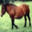

In [4]:
display(array_to_img(x_train_all[7]))

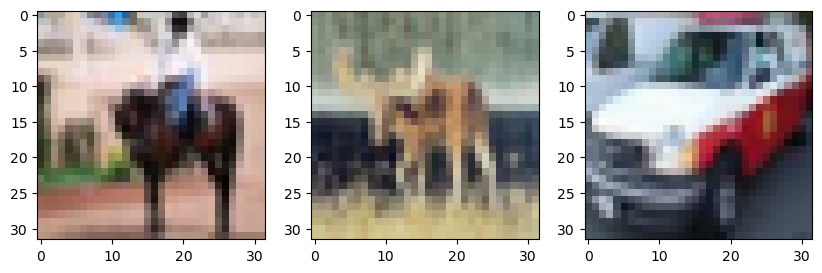

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(x_train_all[11])
plt.subplot(1,3,2)
plt.imshow(x_train_all[28])
plt.subplot(1,3,3)
plt.imshow(x_train_all[60])
plt.show()

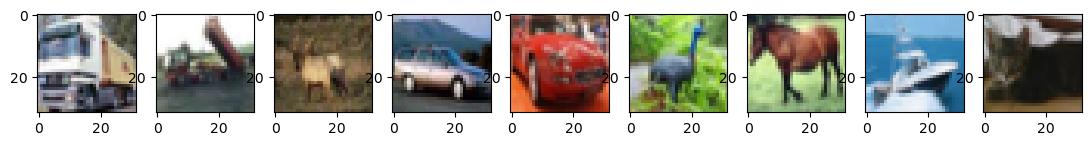

In [6]:
plt.figure(figsize=(15,5))
for i in range(1,10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train_all[i])

# Data processing

In [7]:
x_train_all[0].shape

(32, 32, 3)

In [8]:
x_train_all,x_test=x_train_all/255.0,x_test/255.0

In [9]:
type(x_train_all[0][0][0][0])

numpy.float64

In [10]:
x_train_all=x_train_all.reshape(len(x_train_all),total_inpute)

In [11]:
x_test=x_test.reshape(len(x_test),total_inpute)

# Creating Validation Dataset

In [12]:
x_val=x_train_all[:validation_size]
y_val=y_train_all[:validation_size]
x_val.shape

(10000, 3072)

In [13]:
x_train=x_train_all[validation_size:]
y_train=y_train_all[validation_size:]

In [14]:
x_train.shape

(40000, 3072)

In [15]:
y_train.shape

(40000, 1)

# Creating a small dataset

In [16]:
x_train_xs=x_train_all[:small_train_val]
y_train_xs=y_train_all[:small_train_val]

# Define the Neural network using Keras

In [17]:
model_1=Sequential([
    Dense(units=128,input_dim=total_inpute,activation="relu",name='m1_hidden1'),
    Dense(units=64,activation="relu",name='m1_hidden2'),
    Dense(units=16,activation="relu",name='m1_hidden3'),
    Dense(units=10,activation="softmax",name='m1_output')
])

In [18]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2=Sequential()
model_2.add(Dropout(rate=0.2,seed=42,input_shape=(total_inpute,)))
model_2.add(Dense(128,activation="relu",name="m2_hidden1"))
model_2.add(Dense(68,activation="relu",name="m2_hidden2"))
model_2.add(Dense(16,activation="relu",name="m2_hidden3"))
model_2.add(Dense(10,activation="softmax",name="m2_output"))
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 68)                8772      
                                                                 
 m2_hidden3 (Dense)          (None, 16)                1104      
                                                                 
 m2_output (Dense)           (None, 10)                170       
                                                                 
Total params: 403,390
Trainable params: 403,390
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_3=Sequential()
model_3.add(Dropout(rate=0.2,input_shape=(total_inpute,)))
model_3.add(Dense(128,activation='relu',name='m3_hidden1'))
model_3.add(Dropout(rate=0.25))
model_3.add(Dense(68,activation='relu',name='m3_hidden2'))
model_3.add(Dense(16,activation='relu',name='m3_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m3_output'))
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 3072)              0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 68)                8772      
                                                                 
 m3_hidden3 (Dense)          (None, 16)                1104      
                                                                 
 m3_output (Dense)           (None, 10)                170       
                                                                 
Total params: 403,390
Trainable params: 403,390
Non-tr

In [23]:
model_4=Sequential()
model_4.add(Dropout(rate=0.2,input_shape=(total_inpute,)))
model_4.add(Dense(160,activation='relu',name='m3_hidden1'))
model_4.add(Dense(80,activation='relu',name='m3_hidden2'))
model_4.add(Dense(40,activation='relu',name='m3_hidden3'))
model_4.add(Dense(10,activation='softmax',name='m3_output'))
model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 3072)              0         
                                                                 
 m3_hidden1 (Dense)          (None, 160)               491680    
                                                                 
 m3_hidden2 (Dense)          (None, 80)                12880     
                                                                 
 m3_hidden3 (Dense)          (None, 40)                3240      
                                                                 
 m3_output (Dense)           (None, 10)                410       
                                                                 
Total params: 508,210
Trainable params: 508,210
Non-trainable params: 0
_________________________________________________________________


# TensorBoard Visualising learning

In [25]:
def get_tensorboard(model_name):
    try:
        folder_name=f'{model_name} at {strftime("%a %H %M %p")}'
        dir_paths=os.path.join(Log_dir,folder_name)
        os.makedirs(dir_paths)
    except OSError as e :
        print(e.strerror)
    else:
        print('great success')
    return TensorBoard(log_dir=dir_paths)

In [26]:
%%time
sample_batch=1000
nr_epoch=110
model_1.fit(x_train,y_train,
            batch_size=sample_batch,
            epochs=nr_epoch,
            callbacks=[get_tensorboard("model_1 XL")],
           validation_data=(x_val,y_val),verbose=0)

great success
CPU times: total: 9min 51s
Wall time: 3min 21s


In [27]:
%%time
model_2.fit(x_train,y_train,
            batch_size=sample_batch,
            epochs=nr_epoch,
            callbacks=[get_tensorboard("model_2 XL")],
           validation_data=(x_val,y_val));

great success
Epoch 1/120
40/40 [==============================] - 18s 95ms/step - loss: 2.2693 - accuracy: 0.1534 - val_loss: 2.2077 - val_accuracy: 0.2015
Epoch 2/120
40/40 [==============================] - 3s 72ms/step - loss: 2.1873 - accuracy: 0.2022 - val_loss: 2.1468 - val_accuracy: 0.2360
Epoch 3/120
40/40 [==============================] - 3s 82ms/step - loss: 2.1415 - accuracy: 0.2342 - val_loss: 2.1105 - val_accuracy: 0.2595
Epoch 4/120
40/40 [==============================] - 3s 74ms/step - loss: 2.0924 - accuracy: 0.2598 - val_loss: 2.0555 - val_accuracy: 0.2766
Epoch 5/120
40/40 [==============================] - 3s 75ms/step - loss: 2.0116 - accuracy: 0.2841 - val_loss: 1.9489 - val_accuracy: 0.3157
Epoch 6/120
40/40 [==============================] - 3s 73ms/step - loss: 1.9140 - accuracy: 0.3182 - val_loss: 1.8614 - val_accuracy: 0.3394
Epoch 7/120
40/40 [==============================] - 3s 67ms/step - loss: 1.8500 - accuracy: 0.3434 - val_loss: 1.8010 - val_accuracy

40/40 [==============================] - 3s 65ms/step - loss: 1.4191 - accuracy: 0.4945 - val_loss: 1.4675 - val_accuracy: 0.4712
Epoch 59/120
40/40 [==============================] - 3s 67ms/step - loss: 1.4103 - accuracy: 0.4971 - val_loss: 1.4547 - val_accuracy: 0.4800
Epoch 60/120
40/40 [==============================] - 3s 63ms/step - loss: 1.4083 - accuracy: 0.4966 - val_loss: 1.4826 - val_accuracy: 0.4687
Epoch 61/120
40/40 [==============================] - 3s 67ms/step - loss: 1.4102 - accuracy: 0.4979 - val_loss: 1.4543 - val_accuracy: 0.4727
Epoch 62/120
40/40 [==============================] - 3s 63ms/step - loss: 1.4057 - accuracy: 0.4954 - val_loss: 1.4702 - val_accuracy: 0.4751
Epoch 63/120
40/40 [==============================] - 3s 64ms/step - loss: 1.4116 - accuracy: 0.4954 - val_loss: 1.4689 - val_accuracy: 0.4724
Epoch 64/120
40/40 [==============================] - 3s 63ms/step - loss: 1.4033 - accuracy: 0.4981 - val_loss: 1.4500 - val_accuracy: 0.4790
Epoch 65/120

40/40 [==============================] - 3s 66ms/step - loss: 1.3244 - accuracy: 0.5266 - val_loss: 1.4312 - val_accuracy: 0.4883
Epoch 116/120
40/40 [==============================] - 3s 64ms/step - loss: 1.3207 - accuracy: 0.5239 - val_loss: 1.4296 - val_accuracy: 0.4894
Epoch 117/120
40/40 [==============================] - 3s 64ms/step - loss: 1.3162 - accuracy: 0.5264 - val_loss: 1.4302 - val_accuracy: 0.4912
Epoch 118/120
40/40 [==============================] - 3s 66ms/step - loss: 1.3242 - accuracy: 0.5247 - val_loss: 1.4311 - val_accuracy: 0.4856
Epoch 119/120
40/40 [==============================] - 3s 65ms/step - loss: 1.3240 - accuracy: 0.5275 - val_loss: 1.4406 - val_accuracy: 0.4931
Epoch 120/120
40/40 [==============================] - 3s 65ms/step - loss: 1.3172 - accuracy: 0.5263 - val_loss: 1.4247 - val_accuracy: 0.4906
CPU times: total: 18min 48s
Wall time: 6min 42s


In [28]:
model_3.fit(x_train,y_train,
            batch_size=sample_batch,
           epochs=110,
           callbacks=[get_tensorboard('model_4 XL')],
           validation_data=(x_val,y_val));

great success
Epoch 1/110
40/40 [==============================] - 4s 85ms/step - loss: 2.2606 - accuracy: 0.1412 - val_loss: 2.1467 - val_accuracy: 0.1769
Epoch 2/110
40/40 [==============================] - 3s 67ms/step - loss: 2.1048 - accuracy: 0.1983 - val_loss: 2.0037 - val_accuracy: 0.2697
Epoch 3/110
40/40 [==============================] - 3s 64ms/step - loss: 1.9938 - accuracy: 0.2641 - val_loss: 1.8939 - val_accuracy: 0.3297
Epoch 4/110
40/40 [==============================] - 3s 66ms/step - loss: 1.9234 - accuracy: 0.2993 - val_loss: 1.8357 - val_accuracy: 0.3300
Epoch 5/110
40/40 [==============================] - 3s 64ms/step - loss: 1.8757 - accuracy: 0.3188 - val_loss: 1.7809 - val_accuracy: 0.3602
Epoch 6/110
40/40 [==============================] - 3s 68ms/step - loss: 1.8470 - accuracy: 0.3340 - val_loss: 1.7832 - val_accuracy: 0.3600
Epoch 7/110
40/40 [==============================] - 3s 66ms/step - loss: 1.8212 - accuracy: 0.3412 - val_loss: 1.7312 - val_accuracy:

40/40 [==============================] - 2s 60ms/step - loss: 1.5377 - accuracy: 0.4458 - val_loss: 1.4756 - val_accuracy: 0.4701
Epoch 59/110
40/40 [==============================] - 2s 62ms/step - loss: 1.5355 - accuracy: 0.4468 - val_loss: 1.4799 - val_accuracy: 0.4725
Epoch 60/110
40/40 [==============================] - 2s 60ms/step - loss: 1.5400 - accuracy: 0.4472 - val_loss: 1.4783 - val_accuracy: 0.4774
Epoch 61/110
40/40 [==============================] - 2s 61ms/step - loss: 1.5402 - accuracy: 0.4470 - val_loss: 1.4718 - val_accuracy: 0.4703
Epoch 62/110
40/40 [==============================] - 2s 62ms/step - loss: 1.5444 - accuracy: 0.4436 - val_loss: 1.4781 - val_accuracy: 0.4763
Epoch 63/110
40/40 [==============================] - 3s 67ms/step - loss: 1.5344 - accuracy: 0.4491 - val_loss: 1.4772 - val_accuracy: 0.4761
Epoch 64/110
40/40 [==============================] - 3s 63ms/step - loss: 1.5315 - accuracy: 0.4488 - val_loss: 1.4793 - val_accuracy: 0.4705
Epoch 65/110

# Image predection using keras